In [1]:
import BondGraphTools as bgt

In [2]:
model=bgt.new(name='straight tube')

In [3]:
Se1=bgt.new("Se",value=11.997*1e6)      #(J/m6)
Se2=bgt.new("Se",value=10.664*1e6)      #(J/m6)

C=bgt.new("C", value=0.60015*1e-6)    #(m6/J)

# The amounts of the R-elements are assumed to be equal in a straight tube
R1=bgt.new("R", value=10.664*1e-6)      #(J.s/m6)
R2=bgt.new("R", value=10.664*1e-6)      #(J.s/m6)

# The amounts of the I-elements are assumed to be equal in a straight tube
L1=bgt.new("I", value=0.06665*1e6)     #(J.s2/m6)
L2=bgt.new("I", value=0.06665*1e6)     #(J.s2/m6)

In [4]:
zero_junc=bgt.new("0")
one_junc_1=bgt.new("1")
one_junc_2=bgt.new("1")

In [5]:
bgt.add(model,Se1,Se2,C,R1,R2,L1,L2,zero_junc,one_junc_1,one_junc_2)

In [6]:
bgt.connect(Se1,one_junc_1)
bgt.connect(one_junc_1,R1)
bgt.connect(one_junc_1,L1)
bgt.connect(one_junc_1,zero_junc)
bgt.connect(zero_junc,one_junc_2)
bgt.connect(zero_junc,C)
bgt.connect(one_junc_2,R2)
bgt.connect(one_junc_2,L2)
bgt.connect(Se2,one_junc_2)

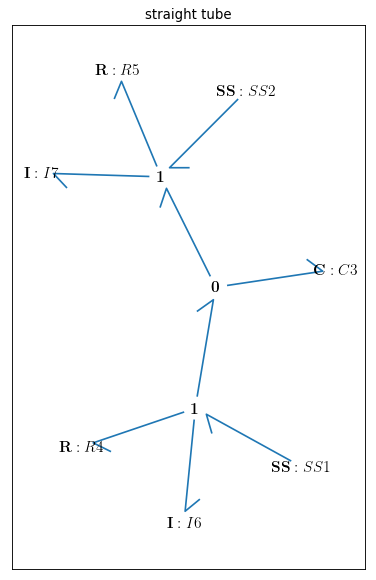

In [8]:
bgt.draw(model)

In [8]:
timespan=[0,5]

In [9]:
model.state_vars

{'x_0': (C: C3, 'q_0'), 'x_1': (I: I6, 'p_0'), 'x_2': (I: I7, 'p_0')}

In [10]:
x0={"x_0":5*1e-6, "x_1":0, "x_2":0}

In [11]:
model.constitutive_relations

[dx_0 - 2344336084021*x_1/156250000000000000 + 2344336084021*x_2/156250000000000000,
 dx_1 + 166625010414063*x_0/100000000 + x_1/6250000000 - 11997000,
 dx_2 - 166625010414063*x_0/100000000 + x_2/6250000000 - 10664000]

In [12]:
t, x = bgt.simulate(model, timespan=timespan, x0=x0)

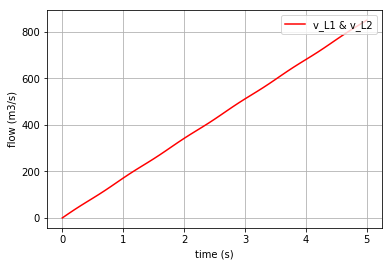

In [13]:
v_L1=x[:,1]/L1._params['L']
import matplotlib.pyplot as plt

plt.plot(t,v_L1, '-r', label='v_L1 & v_L2')
plt.xlabel("time (s)")
plt.ylabel("flow (m3/s)")
plt.legend(loc='upper right')
plt.grid()

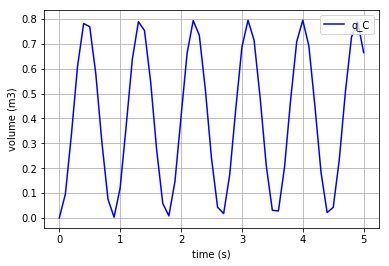

In [14]:
plt.plot(t,x[:,0], '-b', label='q_C')
plt.xlabel("time (s)")
plt.ylabel("volume (m3)")  #metre3
plt.legend(loc='upper right')
plt.grid()

In [15]:
#  dq_C/dt = v_C (flow in the C-element)

import numpy as np
f = np.array(x[:,0], dtype=float)
slope=np.gradient(f,0.1)
v_C=slope

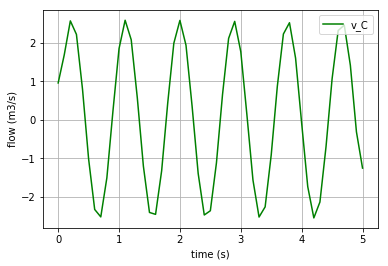

In [16]:
import matplotlib.pyplot as plt
plt.plot(t,v_C, '-g', label='v_C')

plt.xlabel("time (s)")
plt.ylabel("flow (m3/s)")
plt.legend(loc='upper right')
plt.grid()

In [17]:
# u_L1=L1*a_L1 (potential of the identical I-elements)==> u_L1=u_L2

f = np.array(v_L1, dtype=float)
dv_L1=np.gradient(f,0.1)
a_L1=dv_L1
u_L1=L1._params['L']*a_L1

In [18]:
# u_C=C*v_C (potential of the C-element)
u_C=C._params['C']*(x[:,0])

Text(0,0.5,'Potential (J/m3)')

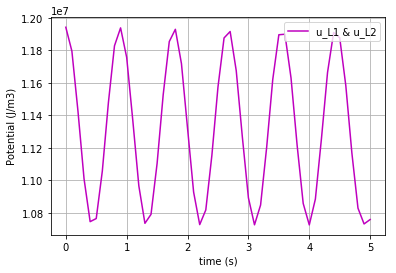

In [19]:
# plotting the potential of L1
fig=plt.plot(t,u_L1,'-m', label='u_L1 & u_L2')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Potential (J/m3)")

Text(0,0.5,'Potential (J/m3)')

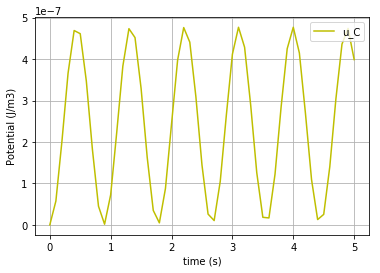

In [20]:
# plotting the potential of C-element
fig=plt.plot(t,u_C,'-y', label='u_C')
plt.grid()
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Potential (J/m3)")